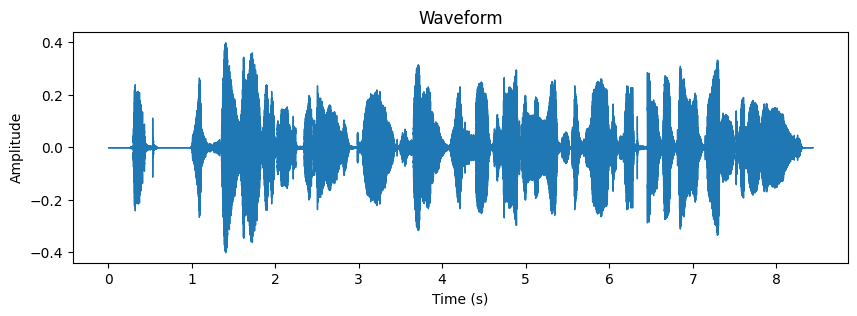

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Transcript: BUT WITH FULL RAVAGEMENT THE HOURS OF PRIME SINGING RECEIVED THEY IN THE MIDST OF LEAVES THAT EVER BORE A BURDEN TO THEIR RHYMES


Device set to use cpu


Sentiment: [{'label': 'POSITIVE', 'score': 0.9896414875984192}]
Keywords: [('rhymes', 0.4971), ('singing', 0.4004), ('prime', 0.2728), ('leaves', 0.2657), ('burden', 0.2423)]


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Transcript: BUT WITH FULL RAVAGEMENT THE HOURS OF PRIME SINGING RECEIVED THEY IN THE MIDST OF LEAVES THAT EVER BORE A BURDEN TO THEIR RHYMES


Device set to use cpu


Sentiment: [{'label': 'POSITIVE', 'score': 0.9896414875984192}]
Keywords: [('rhymes', 0.4971), ('singing', 0.4004), ('prime', 0.2728), ('leaves', 0.2657), ('burden', 0.2423)]


Device set to use cpu


Sentiment: [{'label': '2 stars', 'score': 0.32801827788352966}]
Keywords: [('rhymes', 0.4971), ('singing', 0.4004), ('prime', 0.2728), ('leaves', 0.2657), ('burden', 0.2423)]


In [ ]:
import torchaudio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio
waveform, sample_rate = torchaudio.load("/content/LibriSpeech/dev-clean/84/121550/84-121550-0000.flac")

# Convert waveform to numpy
wave_np = waveform[0].numpy()

# Plot waveform using librosa.display.waveshow
plt.figure(figsize=(10, 3))
librosa.display.waveshow(wave_np, sr=sample_rate)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch

# Load model and processor from Hugging Face
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")



def transcribe(audio_path):
    waveform, sample_rate = torchaudio.load(audio_path)
    input_values = processor(waveform[0], return_tensors="pt", sampling_rate=sample_rate).input_values
    with torch.no_grad():
        logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]
    return transcription





text = transcribe("/content/LibriSpeech/dev-clean/84/121550/84-121550-0000.flac")
print("Transcript:", text)





from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
result = sentiment_pipeline(text)
print("Sentiment:", result)





from keybert import KeyBERT

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(text)
print("Keywords:", keywords)




import pandas as pd

df = pd.DataFrame({
    "Transcript": [text],
    "Sentiment": [result[0]['label']],
    "Keywords": [", ".join([kw[0] for kw in keywords])]
})

df.to_csv("asr_output.csv", index=False)





# Transcribe audio
text = transcribe("/content/LibriSpeech/dev-clean/84/121550/84-121550-0000.flac")
print("Transcript:", text)

# Run sentiment analysis
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
result = sentiment_pipeline(text)
print("Sentiment:", result)

# Extract keywords
from keybert import KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(text)

# Save to CSV
import pandas as pd
df = pd.DataFrame({
    "Transcript": [text],
    "Sentiment": [result[0]['label']],
    "Keywords": [", ".join([kw[0] for kw in keywords])]
})
df.to_csv("/content/asr_output.csv", index=False)

print("Keywords:", keywords)





from transformers import pipeline

# Use a specific model for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Analyze the sentiment of the transcribed text
result = sentiment_pipeline(text)

# Print the sentiment result
print("Sentiment:", result)




from keybert import KeyBERT

# Initialize KeyBERT model
kw_model = KeyBERT()

# Extract keywords from the transcript
keywords = kw_model.extract_keywords(text)

# Print the extracted keywords
print("Keywords:", keywords)





import pandas as pd

# Prepare the data to be saved in CSV
df = pd.DataFrame({
    "Transcript": [text],
    "Sentiment": [result[0]['label']],  # Get the sentiment label from the result
    "Keywords": [", ".join([kw[0] for kw in keywords])]  # Join keywords into a string
})

# Save the DataFrame as a CSV file
df.to_csv("asr_output.csv", index=False)


